### Boston House Price Dataset

_This dataset used in this project comes from the UCI Machine Learning Repository. This data was collected in 1978 and exh of the 506 entries represents aggregate information about 14 features of homes from various suburbs located in Boston._

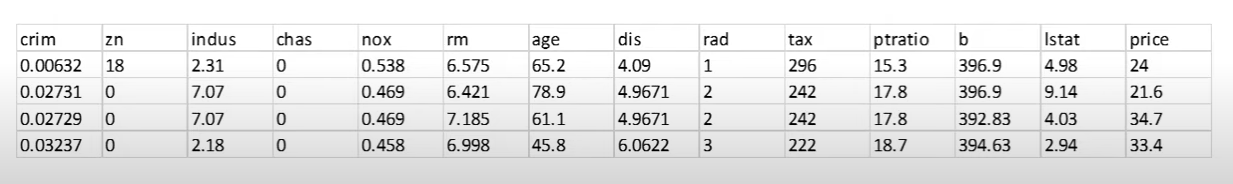

**Importing the Dependencies**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

**Importing the Boston House Price Dataset**

In [2]:
house_price_dataset = pd.read_csv("housing.csv", header = None,
                                  delim_whitespace=True)

In [3]:
house_price_dataset.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
feature_names = [
    "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", 
    "RAD", "TAX", "PTRATIO", "B", "LSTAT", "PRICE"
]

house_price_dataset.columns = feature_names
features = house_price_dataset.columns.tolist()

In [5]:
house_price_dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [6]:
# Checking the number of rows and columns in the DataFrame
house_price_dataset.shape

(506, 14)

In [7]:
# Check for missing values 
house_price_dataset.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [8]:
# Statistical measures of the dataset
house_price_dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


**Understanding the correlation between various features in the dataset**

Basically there are two types of correlation. They are:

1. Positive Correlation
2. Negative Correlation

**Positive Correlation:** Positive correlation means that as one thing increases, the other thing also tends to increase. In other words, when two things are positively correlated, they move in the same direction. For example, if the temperature goes up, ice cream sales might also goes up becaue people tend to buy icecream more when its summer.

**Negative Correlation:** Negative correlation means that as one thing increases, the other thing tends to decrease. In other words, when two things are negatively correlated, they move in opposite directions. For example, the more you spend on heating during winter, the less you may spend on cooling, since you are not using air conditioning as much as during summer

In [9]:
correlation = house_price_dataset.corr()

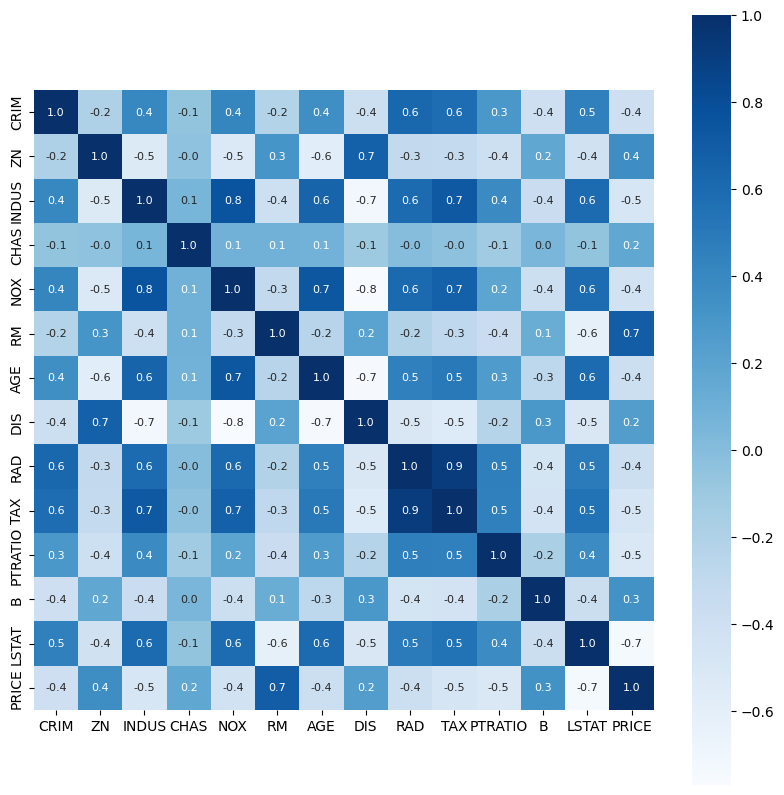

In [10]:
# Constructing a heatmap to understand correlation.
plt.figure(figsize = (10,10))
sns.heatmap(correlation, cbar = True, square = True, fmt = '.1f',
           annot = True, annot_kws = {'size': 8}, cmap = 'Blues')
plt.show()

Here in the above heatmap, we have use this following propeties to describe the heatmap properly
- **cbar:** The color bar (cbar) is the scale that represents the mapping of data values to colors in the heatmap.
- **square:** This controls whether the heatmap will have square cells.
- **fmt:** Format string for displaying numbers in the heatmap.
- **annot:** Whether to annotate each cell with its numeric value.
- **annot_kws:** A dictionary of keyword arguments to pass to the text function when annotating cells.
- **cmap:** The color map (cmap) for the heatmap. the type is str or Colormap (e.g., 'Blues', 'coolwarm', or a matplotlib colormap object).

**Splitting the data and Target**

In [11]:
X = house_price_dataset.drop(columns = ['PRICE'], axis = 1)
Y = house_price_dataset['PRICE']

In [12]:
print(X)
print(Y)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273.0   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273.0   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273.0   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273.0   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273.0   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       1

**Splitting the data into Training data and Test Data**

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(\
    X, Y, test_size = 0.2, random_state = 2)

In [14]:
print(X.shape, X_train.shape, X_test.shape)

(506, 13) (404, 13) (102, 13)


**Model Training**

**XGBoost Regressor** _(Ensemble Model)_

In [15]:
# Loading the model
model = XGBRegressor()

In [16]:
# Training the model with X_train
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

**Prediction on the training data**

In [17]:
# Accuracy for prediction on training data
training_data_prediction = model.predict(X_train)

In [18]:
training_data_prediction

array([23.112196 , 20.992601 , 20.10438  , 34.67932  , 13.920501 ,
       13.499354 , 21.998383 , 15.206723 , 10.89543  , 22.67402  ,
       13.795236 ,  5.602332 , 29.808502 , 49.98666  , 34.89634  ,
       20.594336 , 23.388903 , 19.2118   , 32.69294  , 19.604128 ,
       26.978151 ,  8.405952 , 46.00062  , 21.70406  , 27.084402 ,
       19.372278 , 19.297894 , 24.79984  , 22.608278 , 31.707775 ,
       18.53683  ,  8.703393 , 17.40025  , 23.698814 , 13.29729  ,
       10.504759 , 12.693588 , 24.994888 , 19.694864 , 14.911037 ,
       24.20254  , 24.991112 , 14.901547 , 16.987965 , 15.592753 ,
       12.704759 , 24.505623 , 15.007718 , 49.999355 , 17.509344 ,
       21.18844  , 31.999287 , 15.606071 , 22.902134 , 19.309835 ,
       18.697083 , 23.302961 , 37.19767  , 30.102247 , 33.117855 ,
       20.993683 , 50.00471  , 13.40048  ,  5.002565 , 16.50862  ,
        8.4016905, 28.651423 , 19.49218  , 20.595366 , 45.404697 ,
       39.808857 , 33.4055   , 19.81498  , 33.406376 , 25.3020

In [19]:
# R Squared Error
score_1 = metrics.r2_score(Y_train, training_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_train, 
                                      training_data_prediction)

print("R Squared Error: ", score_1)
print("Mean Absolute Error: ", score_2)

R Squared Error:  0.9999980039471451
Mean Absolute Error:  0.0091330346494618


**Prediction on Test Data**

In [20]:
# Accuracy for prediction on test data
test_data_prediction = model.predict(X_test)

In [21]:
# R Squared Error
score_1 = metrics.r2_score(Y_test, test_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_test, 
                                      test_data_prediction)

print("R Squared Error: ", score_1)
print("Mean Absolute Error: ", score_2)

R Squared Error:  0.9051721149855378
Mean Absolute Error:  2.0748727686264927


**Visualizing the acual Prices and Predicted Prices**

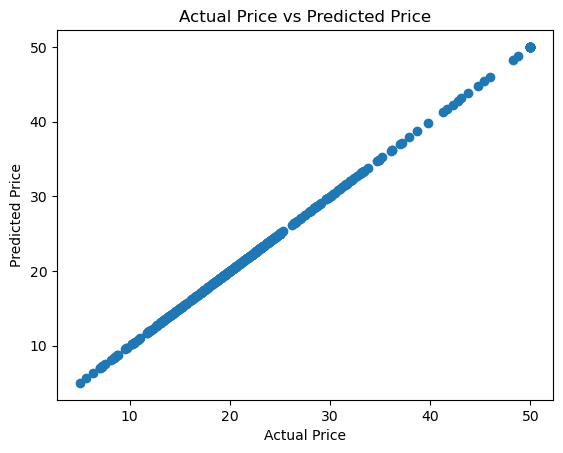

In [22]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()